# CENSUS INCOME DATASET

In [58]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
import os
print(os.getcwd())
hack_data= pd.read_csv("adult.csv")
hack_data['salary']=np.where(hack_data['salary']==" <=50K",0,1)

a= hack_data["salary"].value_counts()
print(a)


C:\Users\adi97\Downloads
0    24720
1     7841
Name: salary, dtype: int64


Hence this is an imbalanced dataset


>50K 7841 , ( 24.080955744602438 %)
<=50K 24720 , ( 75.91904425539757 %)


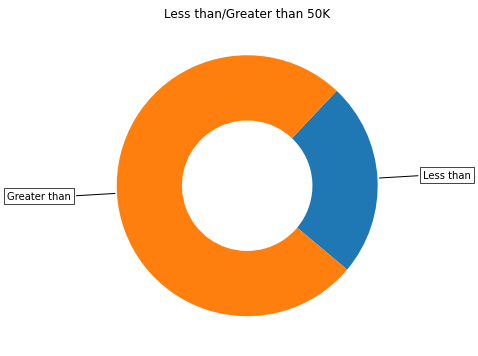

In [61]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

print(">50K", a[1], ", (", (a[1]/(a[1]+a[0]))*100,"%)")
print("<=50K", a[0], ", (", (a[0]/(a[1]+a[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Less than", "Greater than"]

data = [a[1], a[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Less than/Greater than 50K")

plt.show()

### Univariate Analysis

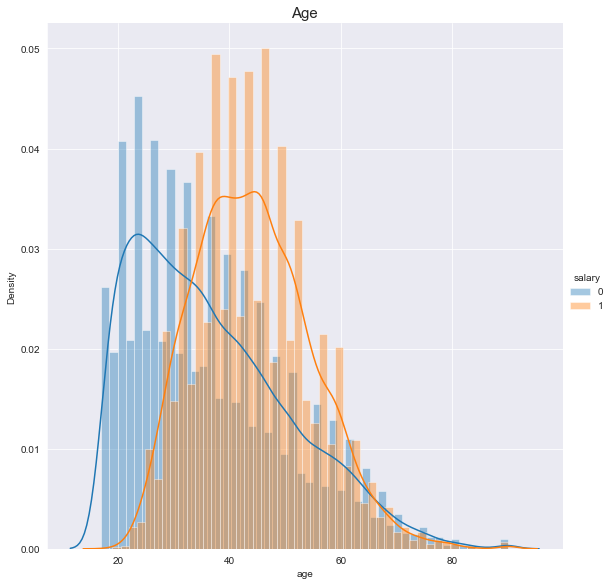

In [78]:
1# Age
sns.set_style("darkgrid")
b=sns.FacetGrid(hack_data,hue="salary",height=8)
b.map(sns.distplot,'age')
b.add_legend()

plt.title('Age', fontsize=15)
plt.show()

In [89]:
def stack_plot(data, xtick, col2='salary', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Number of employees')
    plt.title('Salary <= or >50K')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', '>50K'))
    plt.show()

def univariate_barplots(data, col1, col2='salary', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(hack_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(hack_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(hack_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

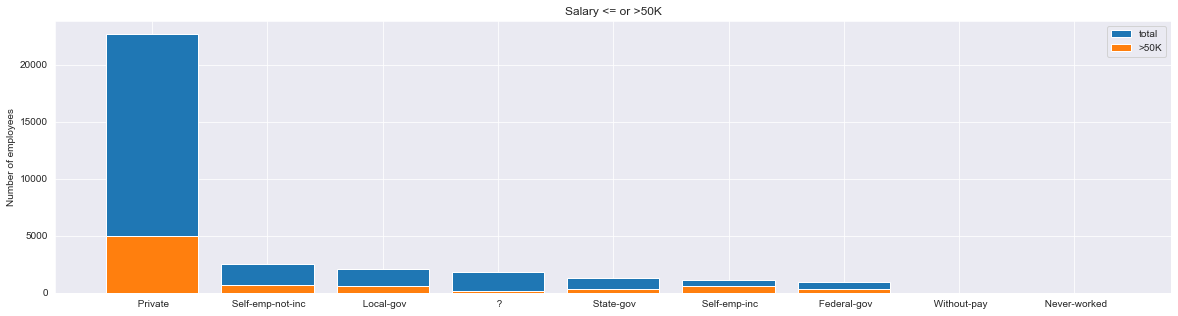

           workclass  salary  total       Avg
4            Private    4963  22696  0.218673
6   Self-emp-not-inc     724   2541  0.284927
2          Local-gov     617   2093  0.294792
0                  ?     191   1836  0.104031
7          State-gov     353   1298  0.271957
       workclass  salary  total       Avg
7      State-gov     353   1298  0.271957
5   Self-emp-inc     622   1116  0.557348
1    Federal-gov     371    960  0.386458
8    Without-pay       0     14  0.000000
3   Never-worked       0      7  0.000000


In [90]:
univariate_barplots(hack_data, 'workclass', 'salary', False)

In [100]:
#education
def stack_plot(data, xtick, col2='salary', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Number of employees')
    plt.title('Salary <= or >50K')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', '>50K'))
    plt.show()

def univariate_barplots(data, col1, col2='salary', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(hack_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(hack_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(hack_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(10))
    

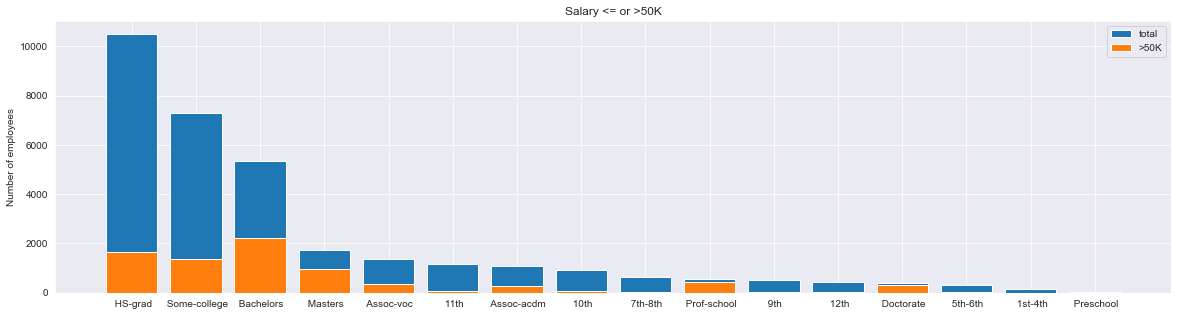

        education  salary  total       Avg
11        HS-grad    1675  10501  0.159509
15   Some-college    1387   7291  0.190235
9       Bachelors    2221   5355  0.414753
12        Masters     959   1723  0.556587
8       Assoc-voc     361   1382  0.261216
1            11th      60   1175  0.051064
7      Assoc-acdm     265   1067  0.248360
0            10th      62    933  0.066452
5         7th-8th      40    646  0.061920
14    Prof-school     423    576  0.734375


In [101]:
univariate_barplots(hack_data, 'education', 'salary', False)

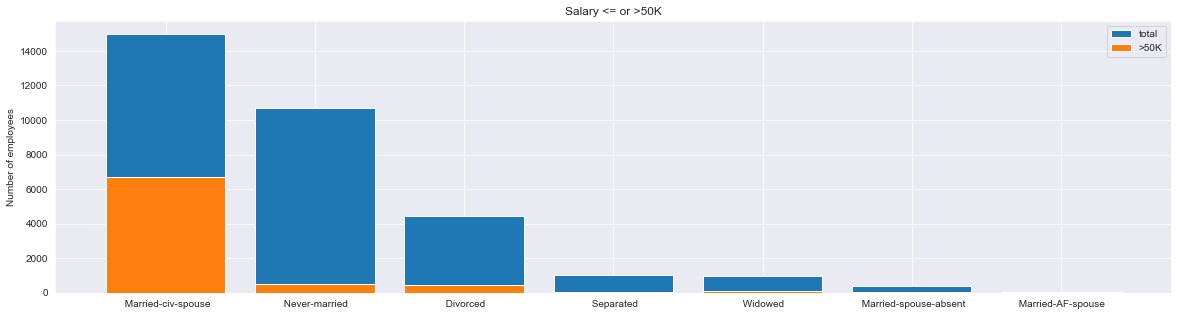

           marital-status  salary  total       Avg
2      Married-civ-spouse    6692  14976  0.446848
4           Never-married     491  10683  0.045961
0                Divorced     463   4443  0.104209
5               Separated      66   1025  0.064390
6                 Widowed      85    993  0.085599
3   Married-spouse-absent      34    418  0.081340
1       Married-AF-spouse      10     23  0.434783


In [102]:
#marital status
univariate_barplots(hack_data, 'marital-status', 'salary', False)

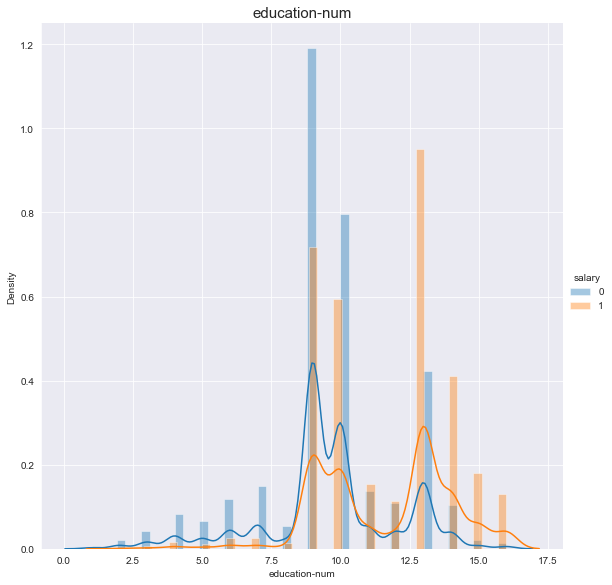

In [103]:
1# education-num
sns.set_style("darkgrid")
b=sns.FacetGrid(hack_data,hue="salary",height=8)
b.map(sns.distplot,'education-num')
b.add_legend()

plt.title('education-num', fontsize=15)
plt.show()

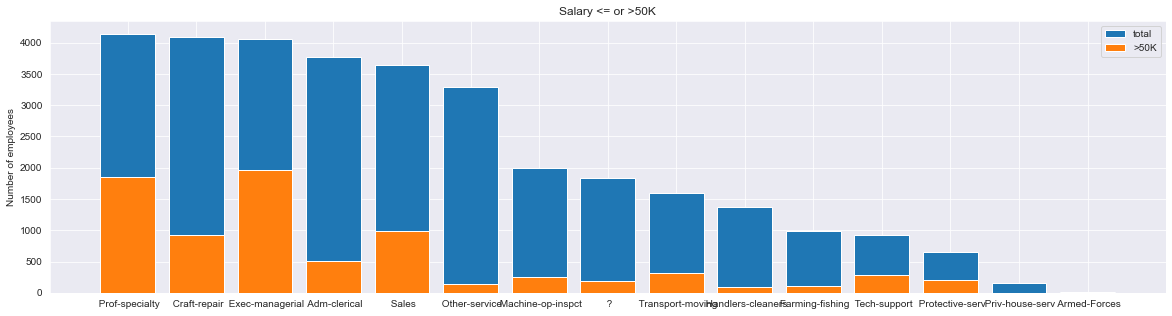

            occupation  salary  total       Avg
10      Prof-specialty    1859   4140  0.449034
3         Craft-repair     929   4099  0.226641
4      Exec-managerial    1968   4066  0.484014
1         Adm-clerical     507   3770  0.134483
12               Sales     983   3650  0.269315
8        Other-service     137   3295  0.041578
7    Machine-op-inspct     250   2002  0.124875
0                    ?     191   1843  0.103635
14    Transport-moving     320   1597  0.200376
6    Handlers-cleaners      86   1370  0.062774


In [104]:
#occupation
univariate_barplots(hack_data, 'occupation', 'salary', False)

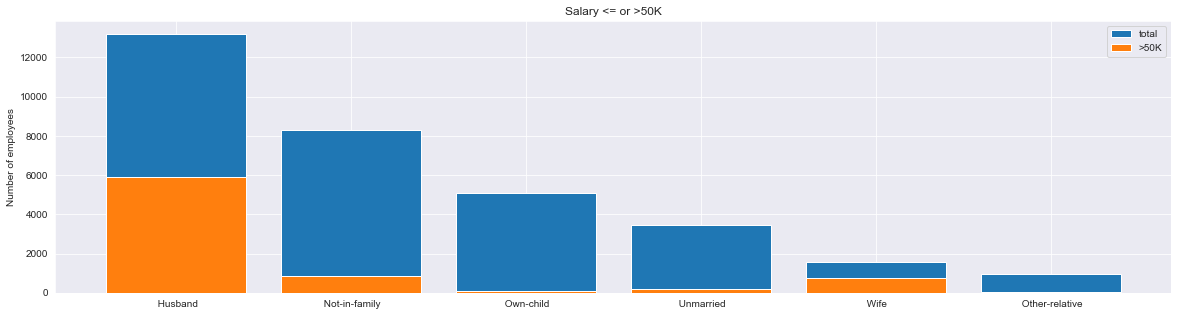

      relationship  salary  total       Avg
0          Husband    5918  13193  0.448571
1    Not-in-family     856   8305  0.103070
3        Own-child      67   5068  0.013220
4        Unmarried     218   3446  0.063262
5             Wife     745   1568  0.475128
2   Other-relative      37    981  0.037717


In [105]:
#relation
univariate_barplots(hack_data, 'relationship', 'salary', False)

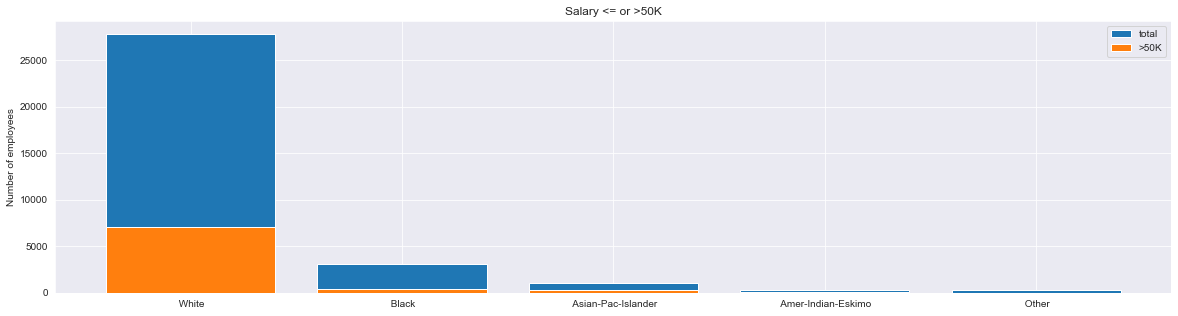

                  race  salary  total       Avg
4                White    7117  27816  0.255860
2                Black     387   3124  0.123880
1   Asian-Pac-Islander     276   1039  0.265640
0   Amer-Indian-Eskimo      36    311  0.115756
3                Other      25    271  0.092251


In [106]:
#race
univariate_barplots(hack_data, 'race', 'salary', False)

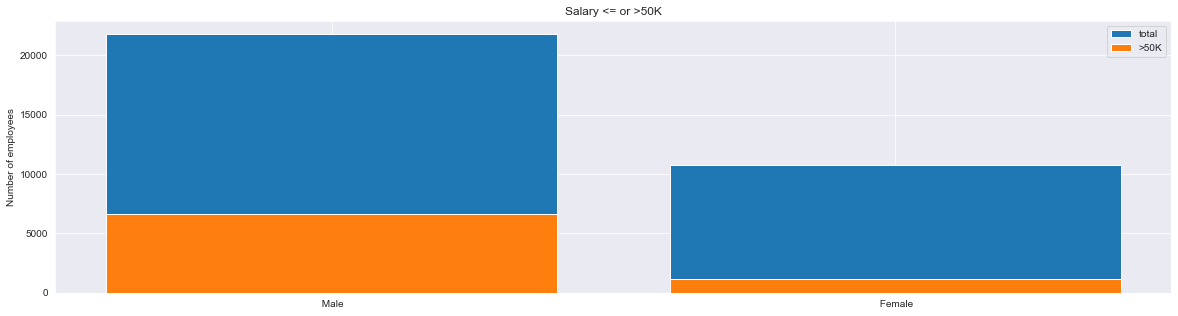

       sex  salary  total       Avg
1     Male    6662  21790  0.305737
0   Female    1179  10771  0.109461


In [107]:
#sex
univariate_barplots(hack_data, 'sex', 'salary', False)

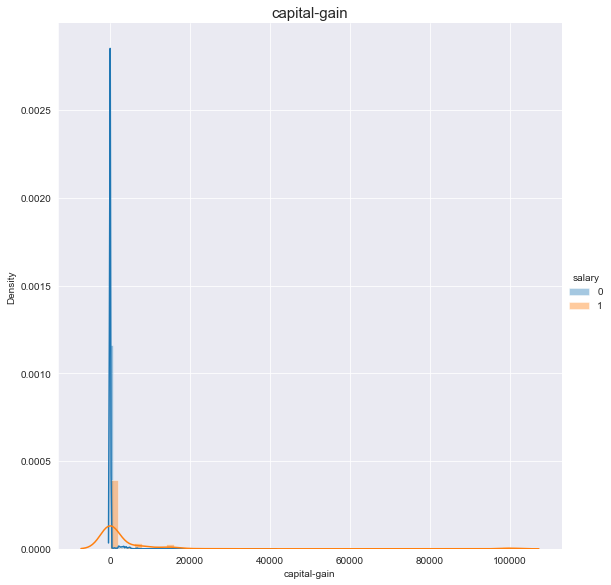

In [108]:
1# capital-gain
sns.set_style("darkgrid")
b=sns.FacetGrid(hack_data,hue="salary",height=8)
b.map(sns.distplot,'capital-gain')
b.add_legend()

plt.title('capital-gain', fontsize=15)
plt.show()

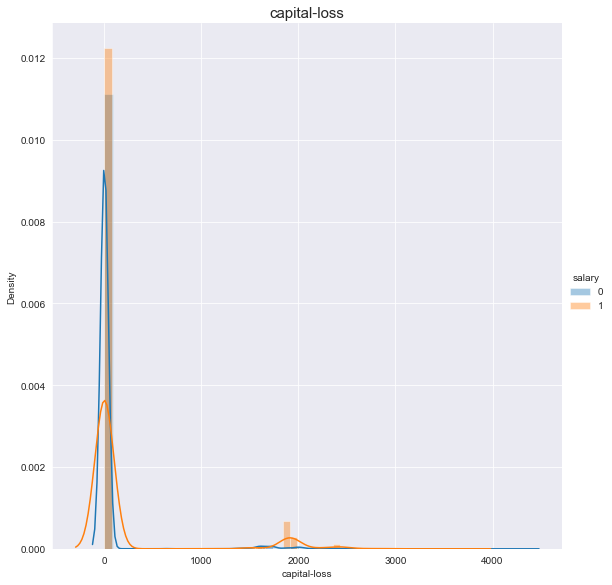

In [109]:
#capital-loss
sns.set_style("darkgrid")
b=sns.FacetGrid(hack_data,hue="salary",height=8)
b.map(sns.distplot,'capital-loss')
b.add_legend()

plt.title('capital-loss', fontsize=15)
plt.show()

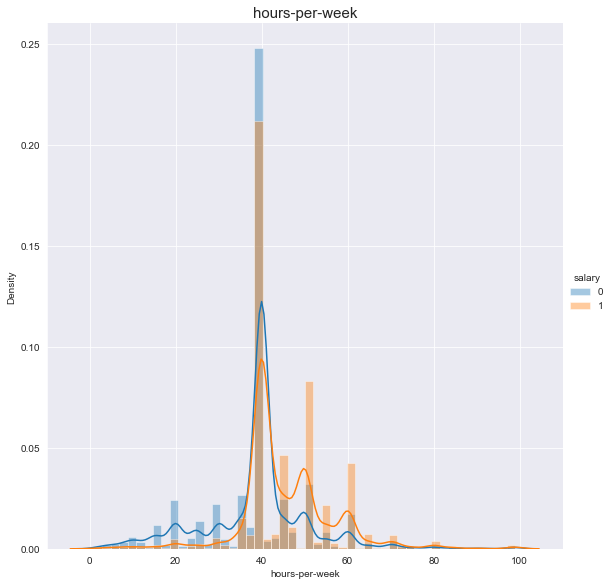

In [110]:
#hours-per-week
sns.set_style("darkgrid")
b=sns.FacetGrid(hack_data,hue="salary",height=8)
b.map(sns.distplot,'hours-per-week')
b.add_legend()

plt.title('hours-per-week', fontsize=15)
plt.show()

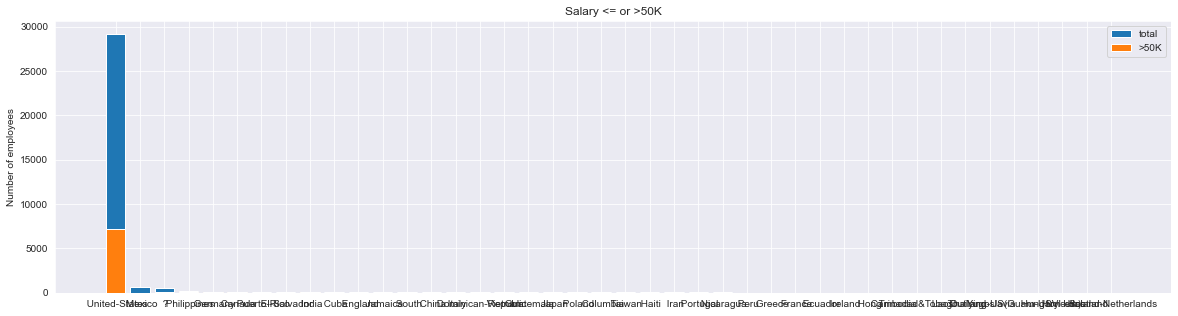

           country  salary  total       Avg
39   United-States    7171  29170  0.245835
26          Mexico      33    643  0.051322
0                ?     146    583  0.250429
30     Philippines      61    198  0.308081
11         Germany      44    137  0.321168
2           Canada      39    121  0.322314
33     Puerto-Rico      12    114  0.105263
8      El-Salvador       9    106  0.084906
19           India      40    100  0.400000
5             Cuba      25     95  0.263158


In [111]:
#country
univariate_barplots(hack_data, 'country', 'salary', False)

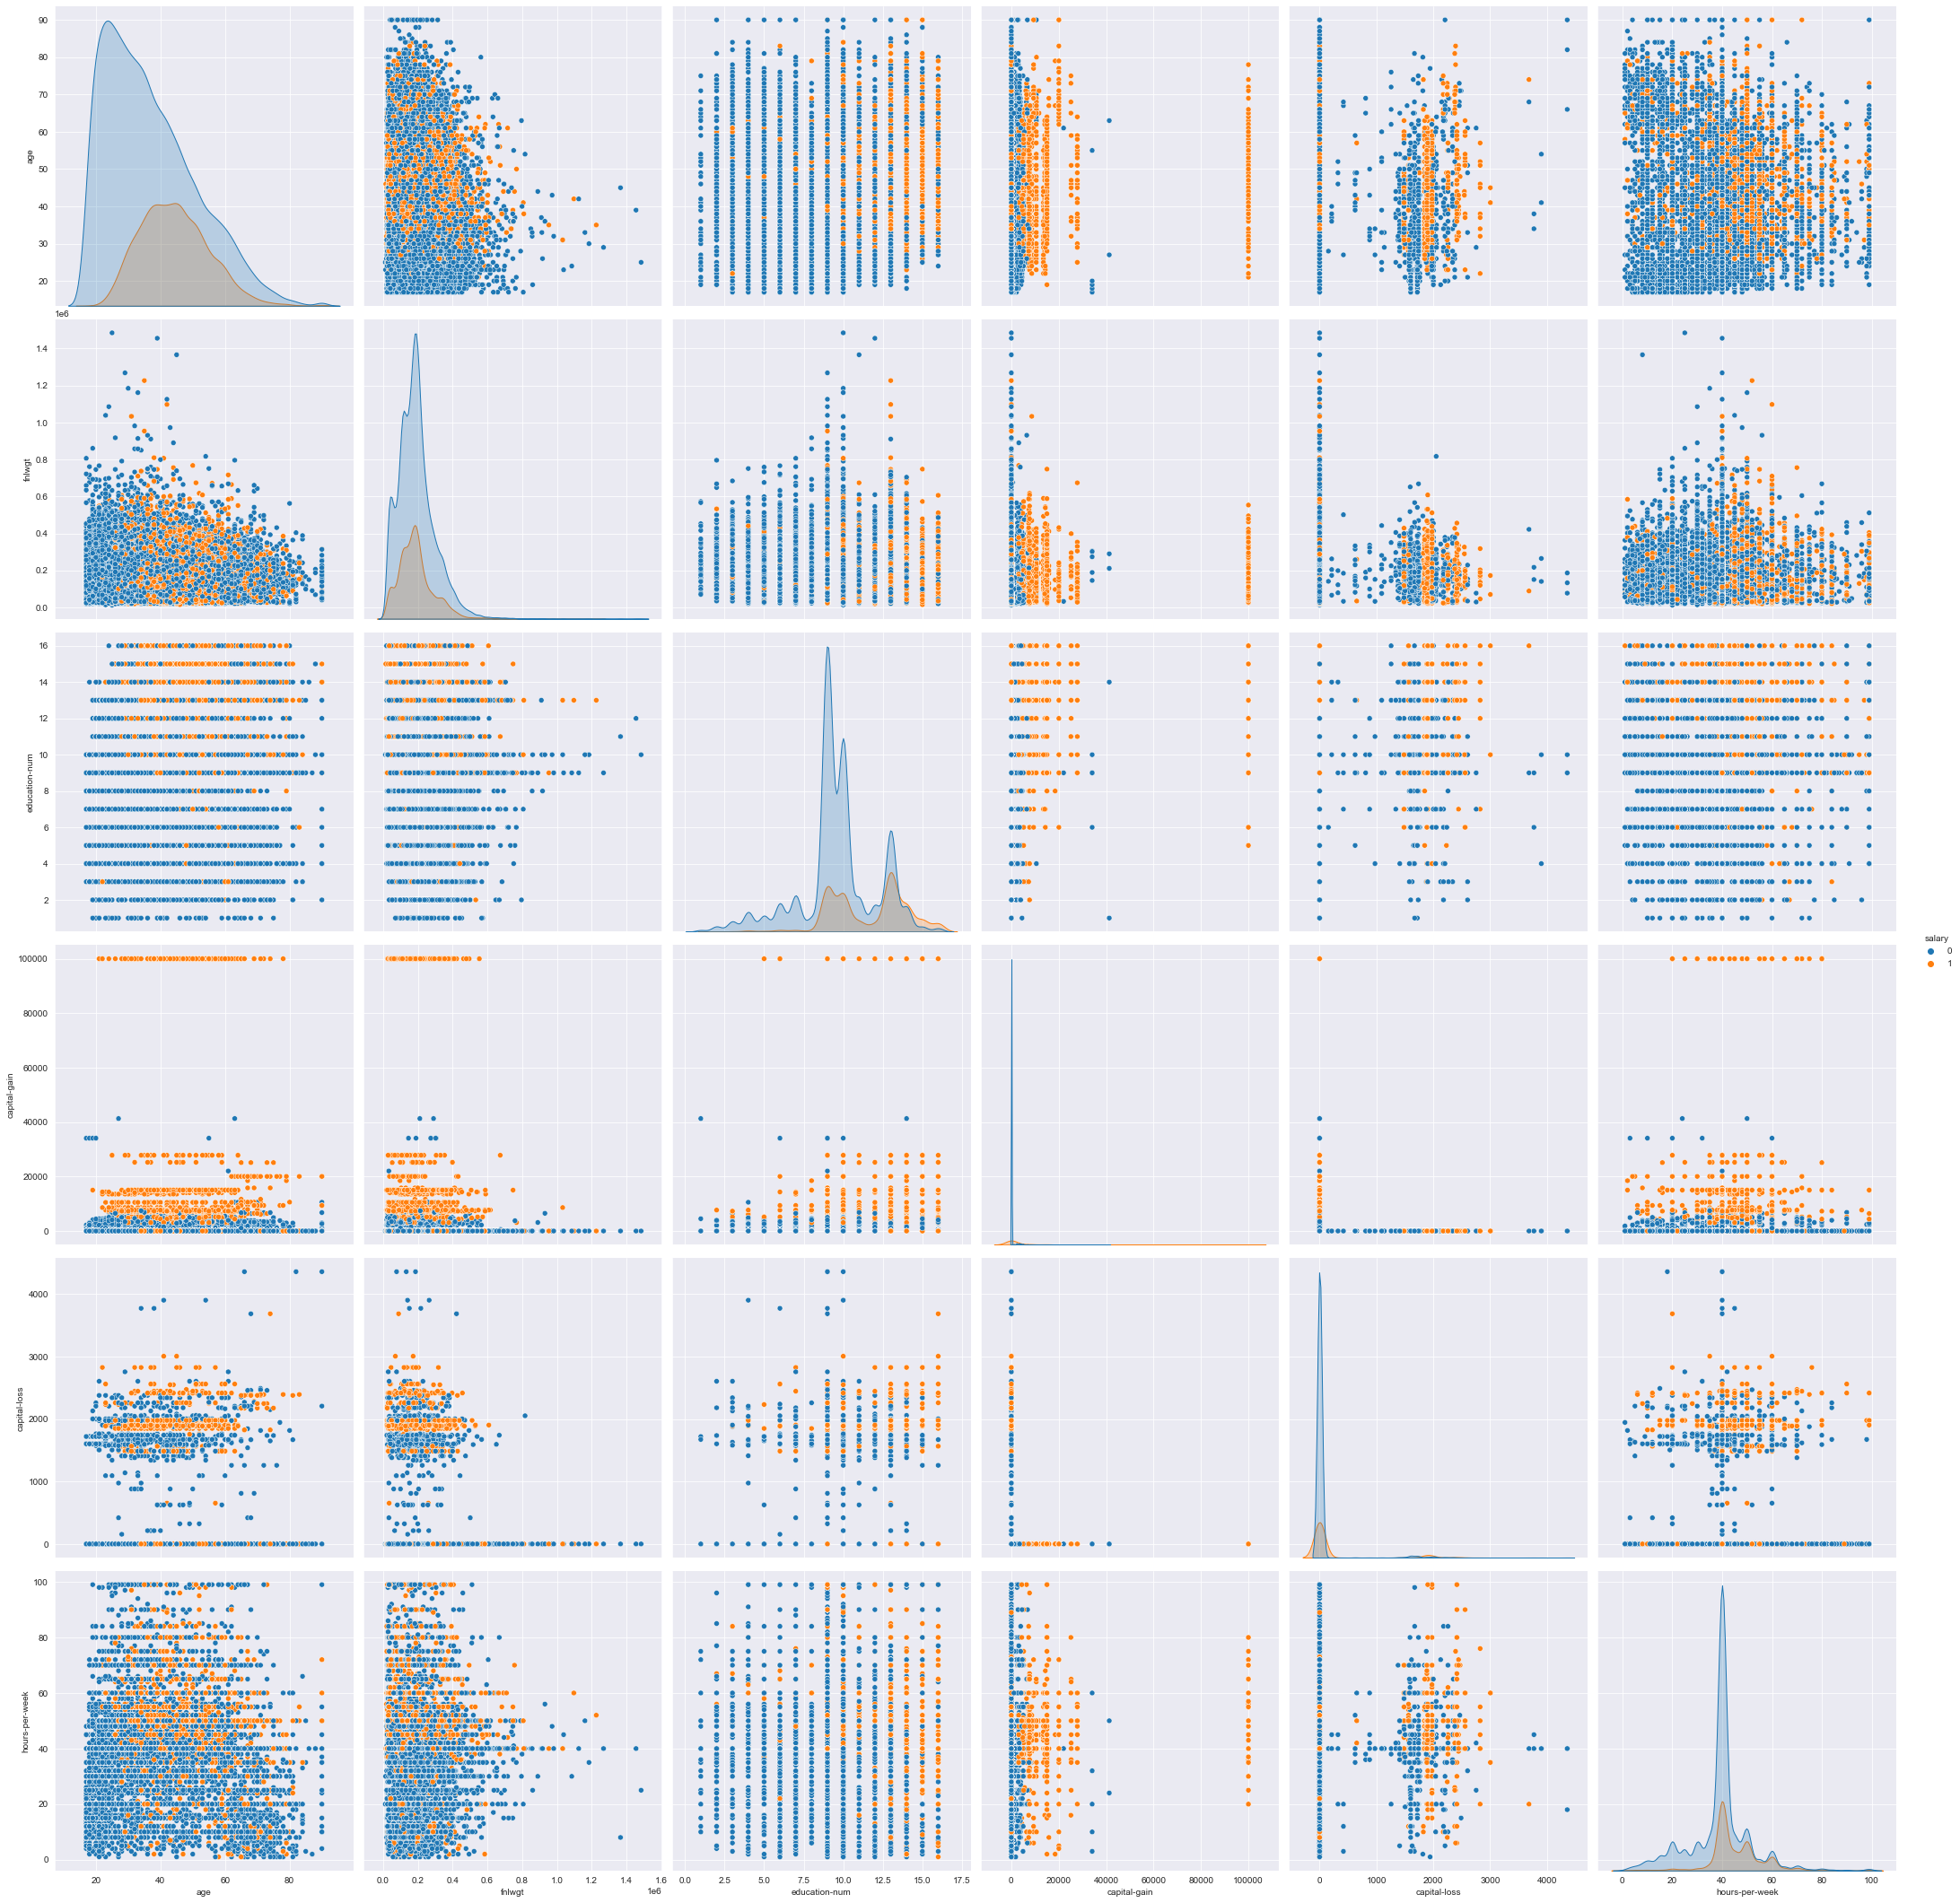

In [112]:
#Pairplot
plt.close()
sns.set_style("darkgrid")
sns.pairplot(hack_data, hue="salary", height=5)
plt.show()

In [113]:
#Vectorization

#1.workclass

vectorizer = CountVectorizer(binary=True)
workclass_ohe = vectorizer.fit_transform(hack_data['workclass'].values)
print("Shape of matrix after one hot encodig ",workclass_ohe.shape)

Shape of matrix after one hot encodig  (32561, 13)


In [114]:
#2 education
#vectorizer = CountVectorizer(binary=True)
education_ohe = vectorizer.fit_transform(hack_data['education'].values)
print("Shape of matrix after one hot encodig ",education_ohe.shape)

Shape of matrix after one hot encodig  (32561, 23)


In [115]:
#3 Marital Status
ms_ohe = vectorizer.fit_transform(hack_data['marital-status'].values)
print("Shape of matrix after one hot encodig ",ms_ohe.shape)


Shape of matrix after one hot encodig  (32561, 9)


In [116]:
#4 Race
race_ohe = vectorizer.fit_transform(hack_data['race'].values)
print("Shape of matrix after one hot encodig ",race_ohe.shape)


Shape of matrix after one hot encodig  (32561, 9)


In [117]:
#5 Sex
sex_ohe = vectorizer.fit_transform(hack_data['sex'].values)
print("Shape of matrix after one hot encodig ",sex_ohe.shape)

Shape of matrix after one hot encodig  (32561, 2)


In [118]:
#6. Country
country_ohe = vectorizer.fit_transform(hack_data['country'].values)
print("Shape of matrix after one hot encodig ",country_ohe.shape)


Shape of matrix after one hot encodig  (32561, 51)


In [119]:
#6.occupation
occ_ohe = vectorizer.fit_transform(hack_data['occupation'].values)
print("Shape of matrix after one hot encodig ",occ_ohe.shape)


Shape of matrix after one hot encodig  (32561, 28)


In [120]:
#6.relationship
rel_ohe = vectorizer.fit_transform(hack_data['relationship'].values)
print("Shape of matrix after one hot encodig ",rel_ohe.shape)


Shape of matrix after one hot encodig  (32561, 10)


In [122]:
#Normalization of Numerical Features

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
normalizer.fit(hack_data['age'].values.reshape(-1,1))
age_cont=normalizer.transform(hack_data['age'].values.reshape(-1,1))
print("After vectorizations")
print(age_cont.shape)

print("="*100)

After vectorizations
(32561, 1)


In [124]:
#fnlwgt

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
normalizer.fit(hack_data['fnlwgt'].values.reshape(-1,1))
fnlwgt_cont=normalizer.transform(hack_data['fnlwgt'].values.reshape(-1,1))
print("After vectorizations")
print(fnlwgt_cont.shape)

print("="*100)

After vectorizations
(32561, 1)


In [125]:
#education-num

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
normalizer.fit(hack_data['education-num'].values.reshape(-1,1))
education_num_cont=normalizer.transform(hack_data['education-num'].values.reshape(-1,1))
print("After vectorizations")
print(education_num_cont.shape)

print("="*100)

After vectorizations
(32561, 1)


In [127]:
#capital-gain

#education-num

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
normalizer.fit(hack_data['capital-gain'].values.reshape(-1,1))
capital_gain_cont=normalizer.transform(hack_data['capital-gain'].values.reshape(-1,1))
print("After vectorizations")
print(capital_gain_cont.shape)

print("="*100)

After vectorizations
(32561, 1)


In [128]:
#capital-loss

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
normalizer.fit(hack_data['capital-loss'].values.reshape(-1,1))
capital_loss_cont=normalizer.transform(hack_data['capital-loss'].values.reshape(-1,1))
print("After vectorizations")
print(capital_loss_cont.shape)

print("="*100)

After vectorizations
(32561, 1)


In [131]:
#hours-per-week

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
normalizer.fit(hack_data['hours-per-week'].values.reshape(-1,1))
hours_per_week_cont=normalizer.transform(hack_data['hours-per-week'].values.reshape(-1,1))
print("After vectorizations")
print(hours_per_week_cont.shape)

print("="*100)

After vectorizations
(32561, 1)


In [132]:
y=hack_data['salary'].values.reshape(-1,1)
print(y.shape)

(32561, 1)


In [133]:
from scipy.sparse import hstack
X = hstack((workclass_ohe, education_ohe, ms_ohe, race_ohe,sex_ohe,country_ohe,occ_ohe,rel_ohe,age_cont,fnlwgt_cont,education_num_cont,capital_gain_cont,capital_loss_cont,hours_per_week_cont,y))

In [135]:
X.shape

(32561, 152)

In [136]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)


In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
distributions = dict(n_neighbors=[3,4,5,6,7,8])
clf = RandomizedSearchCV(neigh, distributions, random_state=0)
search = clf.fit(X_train,y_train)
search.best_params_

{'n_neighbors': 3}

In [139]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
#print(aaa)

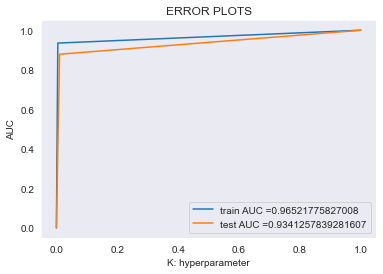

In [141]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()